# Kiran Final Data
## NutriNet: Maya Coronado, Savannah Gourley, Xander Lee, Kiran Rao
making a LBW0 chart AND an index 

In [75]:
# to read and wrangle data
import pandas as pd
import numpy as np

# to import data from LA Data portal
from sodapy import Socrata

# to create spatial data
import geopandas as gpd

# for basemaps
import contextily as ctx

# For spatial statistics
import esda
from esda.moran import Moran, Moran_Local

import splot
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster,plot_moran_simulation

import libpysal as lps

# Graphics
import matplotlib.pyplot as plt
import plotly.express as px

import folium

In [76]:
df = pd.read_csv('data/Main Data.csv')
censusdata = gpd.read_file('data/Census_Tracts_2020.geojson')

In [77]:
df.columns

Index(['Unnamed: 0', 'tract', 'census tract', 'sup_dist', 'csa', 'spa',
       'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent'],
      dtype='object')

In [78]:
df.columns = ['Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa', 'spa',
       'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent']
df.columns

Index(['Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa', 'spa', 'ESRI_OID',
       'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent'],
      dtype='object')

In [79]:
df['census tract']='0'+ df['tract'].apply(str)

Note: Because our data is at the tract level, we also kept the boundaries/blocks of our census tracts appropiately. 

In [80]:
df.head()

,Unnamed: 0,ignore,tract,sup_dist,csa,spa,ESRI_OID,Shape__Area,Shape__Length,Total Woman 15-50,...,Fertility Rate,Low Birth Weight,Low Birth Weight Pctl,Average income,Grocery Store Low Access,Grocery Store Low Access Proportion,CalFresh Cases,CF cases per 100,PoCPercent,census tract
0,0,6037980009,6037980009,District 5,Los Angeles - Los Feliz,SPA 4 - Metro,4427,2.284265e+08,78138.601740,5,...,0.000000,0.0,0.0,NaN,0.0,0.0,1.0,0.0,0.48,06037980009
1,0,6037207307,6037207307,District 1,Los Angeles - Downtown,SPA 4 - Metro,2493,5.271600e+05,2910.616691,400,...,0.000000,0.0,0.0,12283.0,0.0,0.0,453.0,415.6,0.62,06037207307
2,0,6037207305,6037207305,District 1,Los Angeles - Downtown,SPA 4 - Metro,2491,2.182715e+06,8262.438640,246,...,0.000000,0.0,0.0,72330.0,0.0,0.0,108.0,73.5,0.37,06037207305
3,0,6037209202,6037209202,District 1,Los Angeles - Westlake,SPA 4 - Metro,2611,2.667667e+06,6511.253069,459,...,0.056645,0.0,0.0,36188.0,0.0,0.0,131.0,41.6,0.76,06037209202
4,0,6037216301,6037216301,District 2,Los Angeles - Miracle Mile,SPA 4 - Metro,2793,6.049547e+06,11309.816320,204,...,0.063725,0.0,0.0,NaN,0.0,0.0,57.0,14.7,0.21,06037216301


In [81]:
censusdata.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [82]:
censusdata['census tract']='06' + '037' + censusdata ['CT20']

In [83]:
LBW=censusdata.merge(df,on="census tract")

In [84]:
SPA=gpd.read_file('data/Service_Planning_Areas_2022_(view).geojson')

In [85]:
selected_SPAs = SPA[SPA['LABEL'].isin(['SPA 4','SPA 5'])]

In [86]:
our_SPA=gpd.GeoDataFrame(selected_SPAs)

In [87]:
SNAP= pd.read_csv('data/SNAP_Retailer_Location_data.csv')

In [88]:
SNAP.shape

(8132, 17)

In [89]:
SNAP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8132 entries, 0 to 8131
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     8132 non-null   float64
 1   Y                     8132 non-null   float64
 2   Record_ID             8132 non-null   int64  
 3   Store_Name            8132 non-null   object 
 4   Store_Street_Address  8132 non-null   object 
 5   Additonal_Address     746 non-null    object 
 6   City                  8132 non-null   object 
 7   State                 8132 non-null   object 
 8   Zip_Code              8132 non-null   int64  
 9   Zip4                  8132 non-null   object 
 10  County                8132 non-null   object 
 11  Store_Type            8132 non-null   object 
 12  Latitude              8132 non-null   float64
 13  Longitude             8132 non-null   float64
 14  Incentive_Program     89 non-null     object 
 15  Grantee_Name         

In [90]:
SNAP = gpd.GeoDataFrame(SNAP, 
                         crs='EPSG:4326',
                         geometry=gpd.points_from_xy(SNAP.X, SNAP.Y))

In [91]:
SNAP_clip = gpd.clip(SNAP, our_SPA)

In [92]:
SNAP_clip = SNAP_clip.to_crs(epsg=3857)

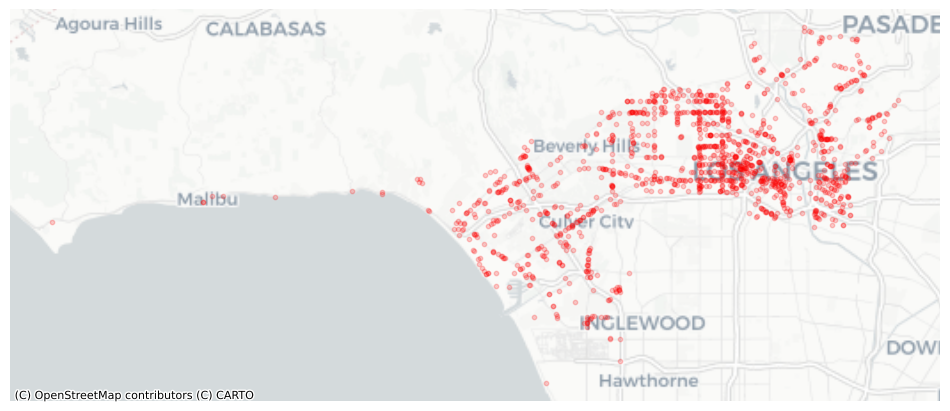

In [93]:
fig,ax = plt.subplots(figsize=(12,12))

SNAP_clip.plot(ax=ax,
             color='red',
             markersize=10,
              alpha=0.2)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Above, we've successfully mapped all SNAP retailers in SPA 4 & 5. We can immediately see a clustering towards downtown and spacing out towards the Westside.

In [94]:
minx, miny, maxx, maxy = SNAP_clip.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13225808.588623803
-13153034.58471261
4017685.127765333
4048354.4142391556


In [95]:
LBW.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   OBJECTID                             537 non-null    int64   
 1   CT20                                 537 non-null    object  
 2   LABEL                                537 non-null    object  
 3   ShapeSTArea                          537 non-null    float64 
 4   ShapeSTLength                        537 non-null    float64 
 5   geometry                             537 non-null    geometry
 6   census tract                         537 non-null    object  
 7   Unnamed: 0                           537 non-null    int64   
 8   ignore                               537 non-null    int64   
 9   tract                                537 non-null    int64   
 10  sup_dist                             537 non-null    object  
 11  csa        

In [96]:
LBW = LBW.to_crs(epsg=3857)

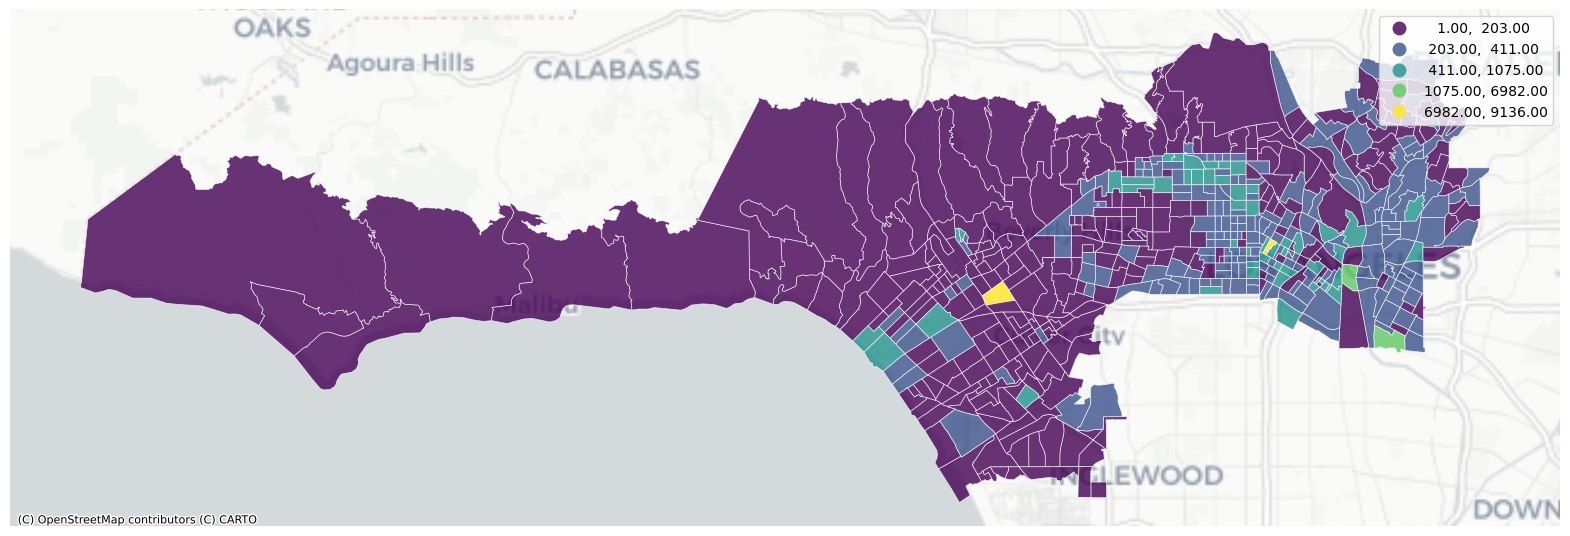

In [97]:

# plot it!
fig, ax = plt.subplots(figsize=(20,20))

LBW.plot(ax=ax,
         column='CalFresh Cases',
         scheme='naturalbreaks', 
         edgecolor='white',
         legend=True,
         lw=0.5,
         alpha=0.8)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

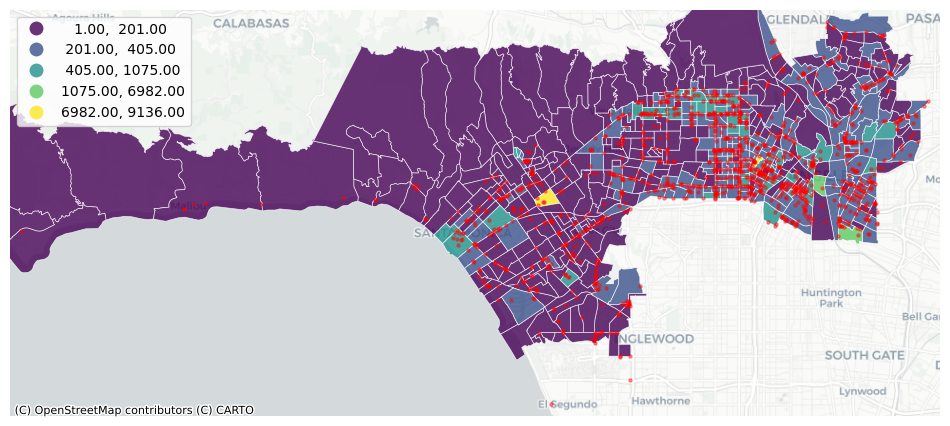

In [98]:
# plot it!
fig, ax = plt.subplots(figsize=(12,12))

LBW.plot(ax=ax,
         column='CalFresh Cases', 
         scheme='naturalbreaks',
         edgecolor='white',
         legend=True,
         lw=0.5,
         alpha=0.8)

SNAP_clip.plot(ax=ax, # this also puts it in the same ax plot
        color='red',
        markersize=5,
        alpha=0.4)

ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

Below, we overlay our grocery stores on top of a rate derived from our data set -- of CF cases per 100. 

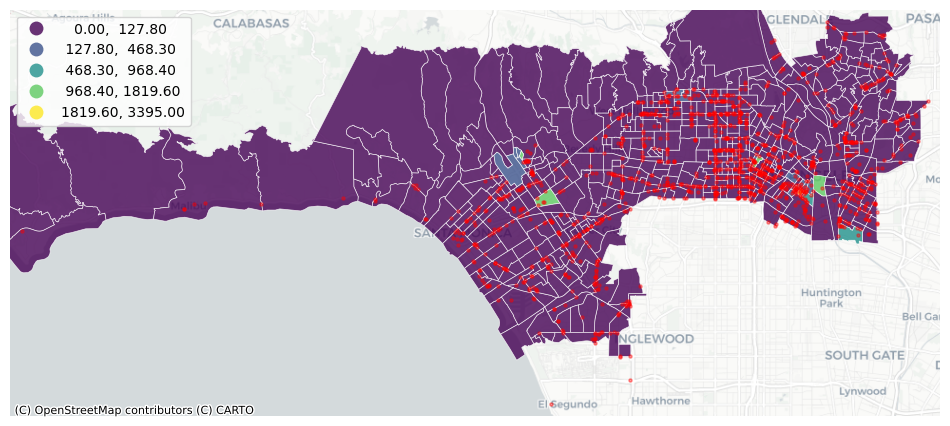

In [99]:
# plot it!
fig, ax = plt.subplots(figsize=(12,12))

LBW.plot(ax=ax,
         column='CF cases per 100', 
         scheme='naturalbreaks',
         edgecolor='white',
         legend=True,
         lw=0.5,
         alpha=0.8)

SNAP_clip.plot(ax=ax, # this also puts it in the same ax plot
        color='red',
        markersize=5,
        alpha=0.4)

ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

For our project's purposes, we've gone ahead and created the base map looking at the % of Low Birth Weights on a census tract level and see significant clustering again by the downtown area. 

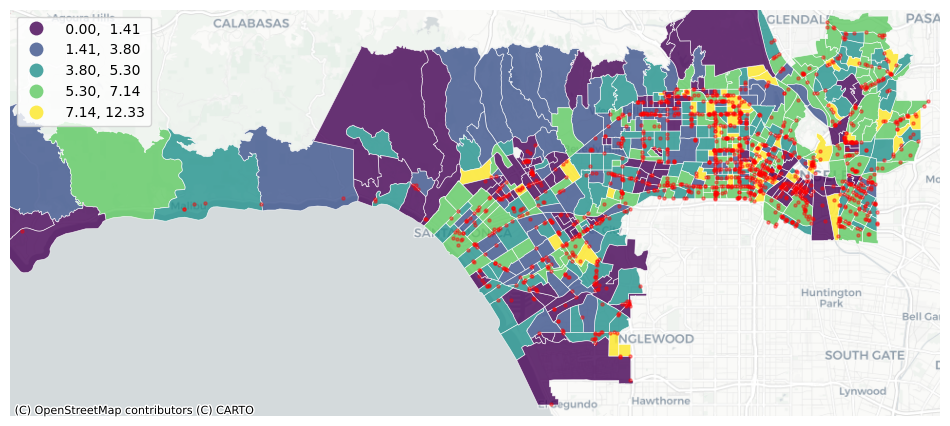

In [100]:
# plot it!
fig, ax = plt.subplots(figsize=(12,12))

LBW.plot(ax=ax,
         column='Low Birth Weight', 
         scheme='naturalbreaks',
         edgecolor='white',
         legend=True,
         lw=0.5,
         alpha=0.8)

SNAP_clip.plot(ax=ax, # this also puts it in the same ax plot
        color='red',
        markersize=5,
        alpha=0.4)

ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

From here, we will conduct a join function to allow us to isolate the amount of SNAP retailers per census tract and pull out significant tracts. 

In [101]:
LBW.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent'],
      dtype='object')

In [102]:
SNAP_clip.columns

Index(['X', 'Y', 'Record_ID', 'Store_Name', 'Store_Street_Address',
       'Additonal_Address', 'City', 'State', 'Zip_Code', 'Zip4', 'County',
       'Store_Type', 'Latitude', 'Longitude', 'Incentive_Program',
       'Grantee_Name', 'ObjectId', 'geometry'],
      dtype='object')

In [103]:
join = gpd.sjoin(LBW, SNAP_clip, how='left')

In [104]:
join.shape

(1503, 47)

In [105]:
join.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent', 'index_right', 'X', 'Y', 'Record_ID',
       'Store_Name', 'Store_Street_Address', 'Additonal_Address', 'City',
       'State', 'Zip_Code', 'Zip4', 'County', 'Store_Type', 'Latitude',
       'Longitude', 'Incentive_Program', 'Grantee_Name', 'ObjectId'],
      dtype='object')

In [106]:
join.columns =['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census_tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total_Pop', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent', 'index_right', 'X', 'Y', 'Record_ID',
       'Store_Name', 'Store_Street_Address', 'Additonal_Address', 'City',
       'State', 'Zip_Code', 'Zip4', 'County', 'Store_Type', 'Latitude',
       'Longitude', 'Incentive_Program', 'Grantee_Name', 'ObjectId']

In [107]:
SNAP_by_tract = join.census_tract.value_counts().rename_axis('census_tract').reset_index(name='SNAP_count')


In [108]:
SNAP_by_tract.columns

Index(['census_tract', 'SNAP_count'], dtype='object')

<Axes: xlabel='census_tract'>

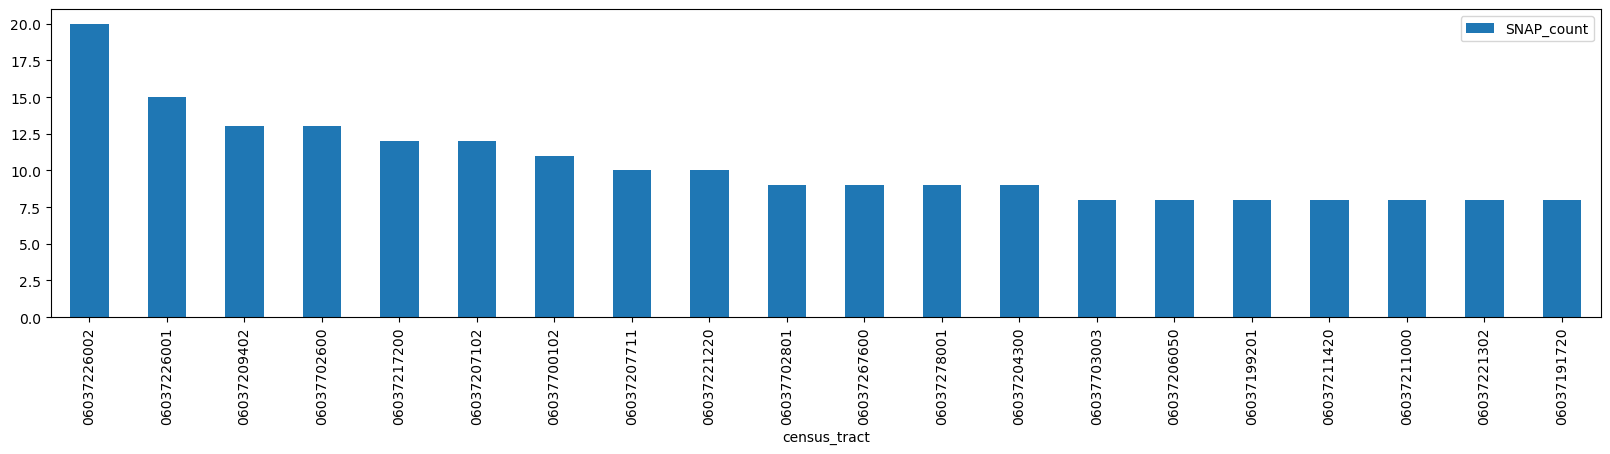

In [109]:
SNAP_by_tract[:20].plot.bar(figsize=(20,4),
                             x='census_tract',
                             y='SNAP_count')

We have the top 20 census tracts above, sorted by the amount of SNAP retailers they have. 

{'whiskers': [<matplotlib.lines.Line2D at 0x7914ca47f890>,
 'caps': [<matplotlib.lines.Line2D at 0x7914ca470f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7914e8edbfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7914ca472050>],
 'fliers': [<matplotlib.lines.Line2D at 0x7914ca472810>],
 'means': []}

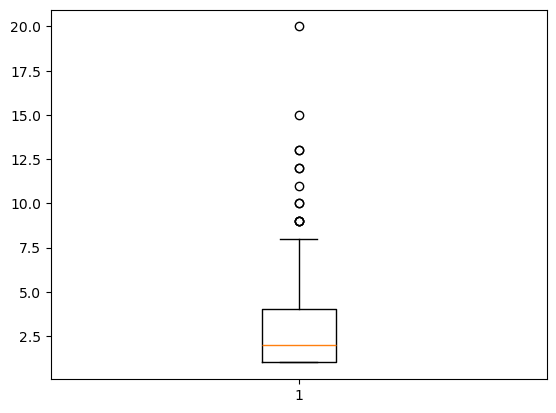

In [110]:
plt.boxplot(SNAP_by_tract.SNAP_count)

<Axes: ylabel='Frequency'>

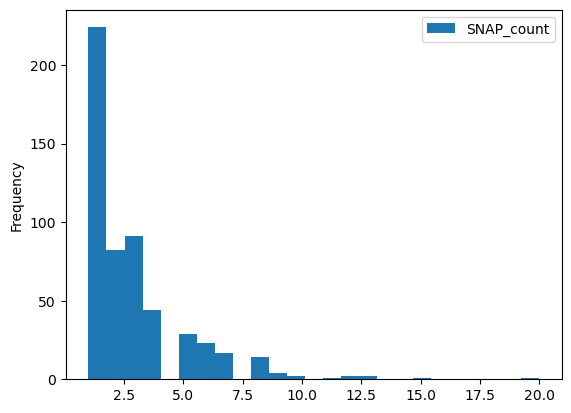

In [111]:
SNAP_by_tract.plot.hist(bins=25)

In [112]:
LBW.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low Birth Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent'],
      dtype='object')

In [113]:
LBW.columns = ['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
      'census_tract', 'Unnamed: 0', 'ignore','tract',
       'sup_dist', 'csa', 'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length',
       'Total Woman 15-50', 'Women with births 12 Months', 'Total_Pop',
       'Birth Rate', 'Fertility Rate', 'Low_Birth_Weight',
       'Low Birth Weight Pctl', 'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent']

In [114]:
LBW = LBW.merge(SNAP_by_tract,on='census_tract')

In [115]:
LBW.sample(10)

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,census_tract,Unnamed: 0,ignore,tract,...,Fertility Rate,Low_Birth_Weight,Low Birth Weight Pctl,Average income,Grocery Store Low Access,Grocery Store Low Access Proportion,CalFresh Cases,CF cases per 100,PoCPercent,SNAP_count
286,678,212800,2128.00,8.409459e+06,11737.630777,"POLYGON ((-13171849.939 4035716.878, -13171752...",06037212800,0,6037212800,6037212800,...,0.048177,5.42,62.61,50053.0,0.0,0.00000,249.0,29.1,0.74,3
294,686,213402,2134.02,4.217750e+06,8305.579389,"POLYGON ((-13168083.554 4035841.427, -13168107...",06037213402,0,6037213402,6037213402,...,0.014570,4.47,37.88,43603.0,0.0,0.00000,571.0,48.9,0.85,6
183,575,204820,2048.20,3.445972e+06,8346.720197,"POLYGON ((-13158176.229 4031661.629, -13158124...",06037204820,0,6037204820,6037204820,...,0.024272,4.91,49.91,49375.0,0.0,0.00000,158.0,32.8,0.67,1
18,410,183701,1837.01,5.929404e+06,12531.344956,"POLYGON ((-13156115.595 4044086.907, -13156121...",06037183701,0,6037183701,6037183701,...,0.042286,3.88,23.92,65313.0,0.0,0.00000,255.0,37.6,0.39,4
133,525,197300,1973.00,7.042091e+06,15215.654315,"POLYGON ((-13163599.048 4039765.776, -13163598...",06037197300,0,6037197300,6037197300,...,0.027027,6.25,79.73,86326.0,0.0,0.00000,241.0,32.2,0.32,2
246,638,209820,2098.20,1.927868e+06,5690.534786,"POLYGON ((-13166499.700 4034871.803, -13166480...",06037209820,0,6037209820,6037209820,...,0.033691,7.67,94.97,36500.0,0.0,0.00000,284.0,54.8,0.76,3
352,919,262302,2623.02,3.297491e+07,32417.747602,"POLYGON ((-13188437.102 4039796.016, -13188454...",06037262302,0,6037262302,6037262302,...,0.016187,3.14,10.75,200781.0,1551.0,0.55039,28.0,4.3,0.14,1
179,571,204420,2044.20,3.251272e+06,7655.418700,"POLYGON ((-13159217.067 4034364.386, -13159210...",06037204420,0,6037204420,6037204420,...,0.054348,6.29,80.16,32993.0,0.0,0.00000,283.0,43.6,0.64,2
289,681,213201,2132.01,3.605253e+06,8208.738578,"POLYGON ((-13169084.651 4036121.434, -13169192...",06037213201,0,6037213201,6037213201,...,0.024712,4.85,48.27,35829.0,0.0,0.00000,399.0,37.9,0.92,5
140,532,199002,1990.02,1.447907e+07,20810.191024,"POLYGON ((-13159502.713 4039884.053, -13159491...",06037199002,0,6037199002,6037199002,...,0.037081,0.00,0.00,62390.0,0.0,0.00000,274.0,44.4,0.74,4


In [116]:
LBW.sort_values(by=['Low_Birth_Weight'])

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,census_tract,Unnamed: 0,ignore,tract,...,Fertility Rate,Low_Birth_Weight,Low Birth Weight Pctl,Average income,Grocery Store Low Access,Grocery Store Low Access Proportion,CalFresh Cases,CF cases per 100,PoCPercent,SNAP_count
536,2494,980038,9800.38,4.861673e+07,42991.767229,"POLYGON ((-13176525.692 4030868.156, -13176524...",06037980038,0,6037980038,6037980038,...,NaN,0.0,0.0,NaN,NaN,0.010579,NaN,NaN,NaN,1
463,1030,275605,2756.05,1.119901e+07,17382.008877,"POLYGON ((-13181334.249 4026235.616, -13181240...",06037275605,0,6037275605,6037275605,...,0.029487,0.0,0.0,95192.0,0.0,0.000000,103.0,19.1,0.47,2
212,604,207711,2077.11,7.469515e+06,14744.237737,"POLYGON ((-13164565.635 4035017.571, -13164535...",06037207711,0,6037207711,6037207711,...,0.022321,0.0,0.0,121477.0,0.0,0.000000,95.0,37.4,0.54,10
213,605,207712,2077.12,4.383834e+06,9437.966004,"POLYGON ((-13164175.126 4034775.208, -13164026...",06037207712,0,6037207712,6037207712,...,0.047104,0.0,0.0,77213.0,0.0,0.000000,399.0,101.0,0.55,7
214,606,207901,2079.01,2.188102e+06,6864.989107,"POLYGON ((-13165131.027 4034286.871, -13165054...",06037207901,0,6037207901,6037207901,...,0.000000,0.0,0.0,68333.0,0.0,0.000000,239.0,57.7,0.62,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,581,206020,2060.20,9.402533e+06,12029.068455,"POLYGON ((-13160942.631 4037163.861, -13160942...",06037206020,0,6037206020,6037206020,...,0.000000,NaN,NaN,105972.0,0.0,0.000000,91.0,126.4,0.70,1
209,601,207400,2074.00,9.358166e+06,15170.871790,"POLYGON ((-13162192.637 4035897.187, -13162189...",06037207400,0,6037207400,6037207400,...,0.000000,NaN,NaN,93036.0,0.0,0.000000,72.0,52.6,0.62,1
373,940,265303,2653.03,1.593000e+06,5749.442745,"POLYGON ((-13186095.830 4037417.561, -13186066...",06037265303,0,6037265303,6037265303,...,0.000000,NaN,NaN,29375.0,0.0,0.000000,571.0,273.2,0.57,1
374,941,265304,2653.04,1.409868e+06,5886.181088,"POLYGON ((-13185932.302 4037436.239, -13185921...",06037265304,0,6037265304,6037265304,...,0.000000,NaN,NaN,20343.0,0.0,0.000000,499.0,309.9,0.54,1


In [117]:
LBW.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census_tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total_Pop', 'Birth Rate',
       'Fertility Rate', 'Low_Birth_Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent', 'SNAP_count'],
      dtype='object')

In [118]:
desired_columns = ['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
      'census_tract',
       'sup_dist', 'csa', 'spa', 'Shape__Area', 'Shape__Length',
       
      'Low_Birth_Weight']

In [119]:
LBW['Low_Birth_Weight'] == LBW['Low_Birth_Weight'].fillna(0).astype(int)

0      False
1      False
2      False
3      False
4      False
       ...  
532    False
533     True
534     True
535     True
536     True
Name: Low_Birth_Weight, Length: 537, dtype: bool

In [120]:
LBW[desired_columns].head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,census_tract,sup_dist,csa,spa,Shape__Area,Shape__Length,Low_Birth_Weight
0,392,181000,1810.00,4.454338e+07,37799.839553,"POLYGON ((-13157763.792 4049180.565, -13157844...",06037181000,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,4.444900e+07,37014.56487,6.04
1,393,181300,1813.00,1.551066e+07,21437.949799,"POLYGON ((-13160041.389 4047497.354, -13160049...",06037181300,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,1.560564e+07,19883.49368,7.11
2,394,181400,1814.00,9.463031e+06,14429.046463,"POLYGON ((-13159654.665 4047523.177, -13159779...",06037181400,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,9.425720e+06,14270.34000,3.87
3,395,181500,1815.00,1.177897e+07,17895.198610,"POLYGON ((-13157943.906 4047564.065, -13158073...",06037181500,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,1.176077e+07,17618.24516,5.93
4,396,181600,1816.00,1.345468e+07,17952.905094,"POLYGON ((-13158195.377 4046409.869, -13158192...",06037181600,District 1,Los Angeles - Eagle Rock,SPA 4 - Metro,1.336064e+07,17197.12390,4.57


In [121]:
LBW[desired_columns].sort_values(by=['Low_Birth_Weight'])

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,census_tract,sup_dist,csa,spa,Shape__Area,Shape__Length,Low_Birth_Weight
536,2494,980038,9800.38,4.861673e+07,42991.767229,"POLYGON ((-13176525.692 4030868.156, -13176524...",06037980038,District 2,Unincorporated - Ladera Heights,SPA 5 - West,4.852656e+07,42566.840170,0.0
463,1030,275605,2756.05,1.119901e+07,17382.008877,"POLYGON ((-13181334.249 4026235.616, -13181240...",06037275605,District 2,Los Angeles - Playa Vista,SPA 5 - West,1.123342e+07,17377.222840,0.0
212,604,207711,2077.11,7.469515e+06,14744.237737,"POLYGON ((-13164565.635 4035017.571, -13164535...",06037207711,District 1,Los Angeles - Downtown,SPA 4 - Metro,7.428549e+06,14671.256670,0.0
213,605,207712,2077.12,4.383834e+06,9437.966004,"POLYGON ((-13164175.126 4034775.208, -13164026...",06037207712,District 1,Los Angeles - Downtown,SPA 4 - Metro,4.383784e+06,9437.955472,0.0
214,606,207901,2079.01,2.188102e+06,6864.989107,"POLYGON ((-13165131.027 4034286.871, -13165054...",06037207901,District 1,Los Angeles - Downtown,SPA 4 - Metro,2.128885e+06,6828.323144,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,581,206020,2060.20,9.402533e+06,12029.068455,"POLYGON ((-13160942.631 4037163.861, -13160942...",06037206020,District 1,Los Angeles - Wholesale District,SPA 4 - Metro,9.395603e+06,11938.556360,NaN
209,601,207400,2074.00,9.358166e+06,15170.871790,"POLYGON ((-13162192.637 4035897.187, -13162189...",06037207400,District 1,Los Angeles - Downtown,SPA 4 - Metro,9.422939e+06,15058.800600,NaN
373,940,265303,2653.03,1.593000e+06,5749.442745,"POLYGON ((-13186095.830 4037417.561, -13186066...",06037265303,District 3,Los Angeles - Westwood,SPA 5 - West,1.594116e+06,5706.964201,NaN
374,941,265304,2653.04,1.409868e+06,5886.181088,"POLYGON ((-13185932.302 4037436.239, -13185921...",06037265304,District 3,Los Angeles - Westwood,SPA 5 - West,1.394811e+06,5790.897800,NaN


In [122]:
LBW0=LBW.loc[LBW['Low_Birth_Weight'] == 0.0]

In [123]:
LBW0.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry,census_tract,Unnamed: 0,ignore,tract,...,Fertility Rate,Low_Birth_Weight,Low Birth Weight Pctl,Average income,Grocery Store Low Access,Grocery Store Low Access Proportion,CalFresh Cases,CF cases per 100,PoCPercent,SNAP_count
22,414,185101,1851.01,8.773447e+06,18663.597141,"POLYGON ((-13158280.870 4043033.224, -13158285...",06037185101,0,6037185101,6037185101,...,0.042232,0.0,0.0,88400.0,0.0,0.000000,212.0,45.3,0.35,2
23,415,185102,1851.02,1.574638e+07,27682.730203,"POLYGON ((-13158684.849 4043685.832, -13158708...",06037185102,0,6037185102,6037185102,...,0.160396,0.0,0.0,145088.0,0.0,0.000000,89.0,9.1,0.31,1
52,444,189501,1895.01,3.691370e+06,9296.864585,"POLYGON ((-13171121.353 4044027.073, -13171119...",06037189501,0,6037189501,6037189501,...,0.022945,0.0,0.0,66071.0,0.0,0.000000,117.0,40.8,0.18,1
53,445,189502,1895.02,2.683325e+06,7299.366956,"POLYGON ((-13172073.358 4043632.723, -13172073...",06037189502,0,6037189502,6037189502,...,0.002825,0.0,0.0,55694.0,0.0,0.000000,261.0,112.0,0.23,2
56,448,189703,1897.03,3.642446e+07,43353.964436,"POLYGON ((-13172653.444 4048519.302, -13172678...",06037189703,0,6037189703,6037189703,...,0.000000,0.0,0.0,106970.0,1814.0,0.586296,79.0,27.1,0.27,1


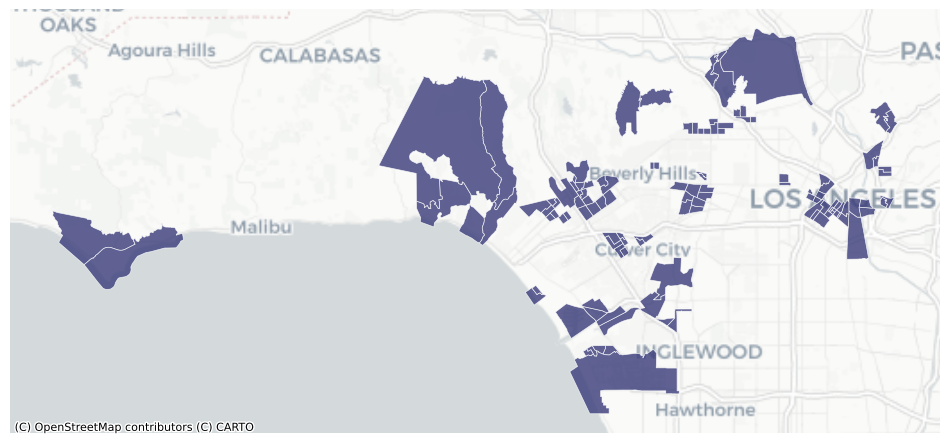

In [124]:
fig, ax = plt.subplots(figsize=(12,12))

LBW0.plot(ax=ax,
         column='Low_Birth_Weight', 
         edgecolor='white',
          cmap= 'tab20b',
         lw=0.5,
         alpha=0.8)

ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [125]:
minx, miny, maxx, maxy = LBW0.geometry.total_bounds
print(minx)
print(maxx)
print(miny)
print(maxy)

-13230312.829852074
-13158027.061734835
4017570.4117105827
4050500.6479052906


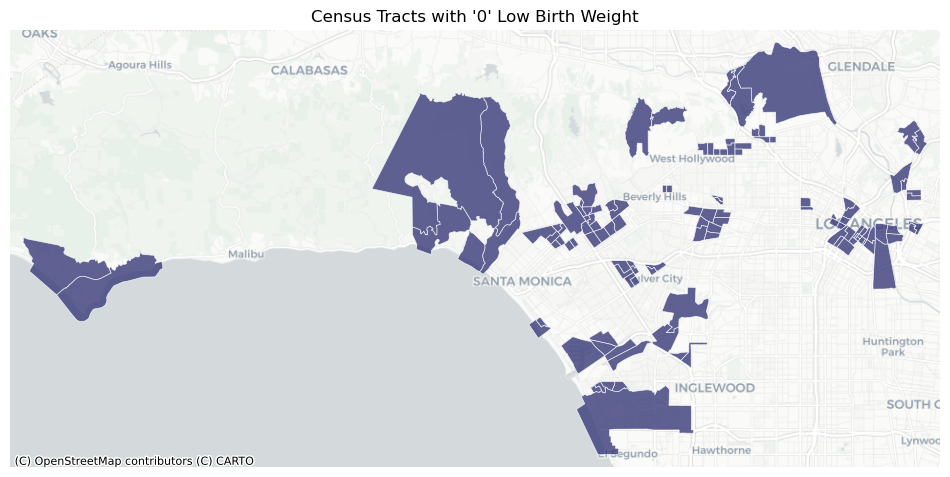

In [126]:
fig, ax = plt.subplots(figsize=(12,12))

LBW0.plot(ax=ax,
         column='Low_Birth_Weight', 
         edgecolor='white',
          cmap= 'tab20b',
         lw=0.5,
         alpha=0.8)

ax.set_xlim(minx - 1000, maxx + 1000) # added/substracted value is to give some margin around total bounds
ax.set_ylim(miny - 1000, maxy + 1000)

plt.title("Census Tracts with '0' Low Birth Weight")
            
ax.axis('off')

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


In [127]:
LBW0.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census_tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total_Pop', 'Birth Rate',
       'Fertility Rate', 'Low_Birth_Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent', 'SNAP_count'],
      dtype='object')

In [128]:
LBW0.columns = ['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census_tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'Neighborhood/City',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total Population', 'Birth Rate',
       'Fertility Rate', 'Low_Birth_Weight', 'Low Birth Weight Pctl',
       'Median Income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent', 'SNAP_count']

In [129]:
    LBW0.explore(column='Low_Birth_Weight', # this defines the field to "choropleth"
        cmap='tab20b', # 
        scheme='naturalbreaks',
        zoom_start = 11,
        location=[34.03,-118.46],
        tiles='OpenStreetMap',
        tooltip='Neighborhood/City',
        highlight=True,    
        popup=['Neighborhood/City','Total Population','Total Woman 15-50','PoCPercent', 'Women with births 12 Months','Median Income','Low_Birth_Weight','census_tract'],     
        style_kwds={
            'weight':0.8,
            'color':'black',
            'opacity':0.6
        })

/opt/conda/lib/python3.11/site-packages/mapclassify/classifiers.py:686: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  self._classify()


Index Indicators: 
- SNAP retailer density
- Proportion of Low-income residents living >1mi from grocery
- Median Income
- Non-white people
- Total Women 15-50


In [130]:
LBW.columns

Index(['OBJECTID', 'CT20', 'LABEL', 'ShapeSTArea', 'ShapeSTLength', 'geometry',
       'census_tract', 'Unnamed: 0', 'ignore', 'tract', 'sup_dist', 'csa',
       'spa', 'ESRI_OID', 'Shape__Area', 'Shape__Length', 'Total Woman 15-50',
       'Women with births 12 Months', 'Total_Pop', 'Birth Rate',
       'Fertility Rate', 'Low_Birth_Weight', 'Low Birth Weight Pctl',
       'Average income', 'Grocery Store Low Access',
       'Grocery Store Low Access Proportion', 'CalFresh Cases',
       'CF cases per 100', 'PoCPercent', 'SNAP_count'],
      dtype='object')

In [194]:
import mapclassify
classifier = mapclassify.NaturalBreaks.make(k=5)

In [199]:
LBW['Grocery Store Low Access Proportion']= LBW['Grocery Store Low Access Proportion'].fillna(0)
LBW['SNAP_count']= LBW['SNAP_count'].fillna(0)
LBW['Average income']= LBW['Average income'].fillna(0)
LBW['PoCPercent']= LBW['PoCPercent'].fillna(0)

In [207]:
LBW.SNAP_count.min

<bound method Series.min of 0      3
1      4
2      6
3      2
4      1
      ..
532    1
533    1
534    1
535    3
536    1
Name: SNAP_count, Length: 537, dtype: int64>

In [206]:
LBW['SNAP_index'] = LBW['SNAP_count'].apply(classifier)

/opt/conda/lib/python3.11/site-packages/mapclassify/classifiers.py:686: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  self._classify()


In [210]:
LBW['csa'].value_counts()

csa
Los Angeles - Hollywood             23
Los Angeles - Boyle Heights         23
Los Angeles - Melrose               22
City of Santa Monica                19
Los Angeles - Westwood              18
                                    ..
Los Angeles - Mandeville Canyon      1
Los Angeles - Cloverdale/Cochran     1
Los Angeles - Lafayette Square       1
Los Angeles - St Elmo Village        1
Unincorporated - West LA             1
Name: count, Length: 79, dtype: int64

In [213]:
SNAP_neigh=LBW.groupby('csa')[['SNAP_count']].mean()

In [218]:
pd.set_option('display.max_rows', None)
print(SNAP_neigh)

                                         SNAP_count
csa                                                
City of Beverly Hills                      1.428571
City of Culver City                        5.444444
City of Malibu                             1.000000
City of Santa Monica                       2.631579
City of West Hollywood                     4.428571
Los Angeles - Angelino Heights             5.000000
Los Angeles - Atwater Village              2.750000
Los Angeles - Bel Air                      1.000000
Los Angeles - Beverly Crest                1.000000
Los Angeles - Beverlywood                  1.333333
Los Angeles - Boyle Heights                4.217391
Los Angeles - Brentwood                    1.090909
Los Angeles - Cadillac-Corning             3.500000
Los Angeles - Carthay                      2.500000
Los Angeles - Century City                 2.000000
Los Angeles - Cheviot Hills                1.000000
Los Angeles - Chinatown                    5.000000
Los Angeles 

In [225]:
SNAP_gro=LBW.groupby('csa')[['Grocery Store Low Access Proportion']].mean()
SNAP_gro


,Grocery Store Low Access Proportion
csa,
City of Beverly Hills,0.114033
City of Culver City,0.000000
City of Malibu,0.224257
City of Santa Monica,0.000534
City of West Hollywood,0.000000
Los Angeles - Angelino Heights,0.000000
Los Angeles - Atwater Village,0.000000
Los Angeles - Bel Air,0.623516
Los Angeles - Beverly Crest,0.810701


In [226]:
SNAP_lad=LBW.groupby('csa')[['Total Woman 15-50']].mean()
SNAP_lad

,Total Woman 15-50
csa,
City of Beverly Hills,1030.571429
City of Culver City,1105.444444
City of Malibu,776.500000
City of Santa Monica,1194.526316
City of West Hollywood,1389.000000
Los Angeles - Angelino Heights,576.000000
Los Angeles - Atwater Village,1015.500000
Los Angeles - Bel Air,803.500000
Los Angeles - Beverly Crest,538.250000
